# Robot 2 DOFs

In [1]:
l1 = 50
l2 = 40
l3 = 20
import numpy as np
import openpyxl

wb = openpyxl.Workbook()
sheet = wb.active
sheet['A1'] = 'Px'
sheet['B1'] = 'Py'
sheet['C1'] = 't1'
sheet['D1'] = 't2'
# t1 is theta 1
# t2 is theta 2
r = 1;
for i in range(0, 700 ):
    for j in range(0, 1350):
        t1 = i/10
        t2 = j/10
        px = l1*np.cos(t1*3.14/180) + l2*np.cos((t1+t2)*3.14/180)
        py = l1*np.sin(t1*3.14/180) + l2*np.sin((t1+t2)*3.14/180)
        r += 1
        px_txt = sheet.cell(row= r, column= 1)
        px_txt.value= f'{px}'

        py_txt = sheet.cell(row= r, column= 2)
        py_txt.value= f'{py}'

        t1_txt = sheet.cell(row= r, column= 3)
        t1_txt.value= f'{t1}'

        t2_txt = sheet.cell(row= r, column= 4)
        t2_txt.value= f'{t2}'

wb.save('bai2.csv')
        

In [2]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_excel('bai2.csv')
x = data.drop(['t1', 't2'], axis= 1)
print(x)
y = data.drop(['Px', 'Py'], axis= 1)
print(y)
col_names = list(x.columns)
s_scaler = StandardScaler()
X_df = s_scaler.fit_transform(x)
X_df = pd.DataFrame(X_df, columns= col_names)
X_df.describe().T

               Px         Py
0       90.000000   0.000000
1       89.999939   0.069778
2       89.999757   0.139555
3       89.999452   0.209332
4       89.999026   0.279109
...           ...        ...
944995 -19.245150  30.485807
944996 -19.216384  30.422234
944997 -19.187507  30.358712
944998 -19.158519  30.295240
944999 -19.129421  30.231819

[945000 rows x 2 columns]
          t1     t2
0        0.0    0.0
1        0.0    0.1
2        0.0    0.2
3        0.0    0.3
4        0.0    0.4
...      ...    ...
944995  69.9  134.5
944996  69.9  134.6
944997  69.9  134.7
944998  69.9  134.8
944999  69.9  134.9

[945000 rows x 2 columns]


,count,mean,std,min,25%,50%,75%,max
Px,945000.0,1.454516e-14,1.000001,-1.840396,-0.800062,-0.068002,0.800191,1.935129
Py,945000.0,2.126694e-16,1.000001,-3.341109,-0.756392,-0.026796,0.803458,1.877316


In [3]:
from sklearn.model_selection import train_test_split
import keras
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop, SGD, Adam
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size = 0.25, random_state = 7)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
model = Sequential()

standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_train = X_train.data.tolist()

X_test = standard_scaler.fit_transform(X_test)
X_test = X_test.data.tolist()

X_train = np.array(X_train)
X_test = np.array(X_test)

model.add(Dense(100, activation= 'relu', kernel_initializer= 'random_normal', input_shape = (2,)))
model.add(Dense(100, activation= 'relu'))
model.add(Dense(100, activation= 'relu'))
model.add(Dense(2))

model.summary()
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='mse', optimizer = RMSprop(), metrics = ['mean_absolute_error'])

history = model.fit(X_train, y_train, batch_size = 1024, epochs = 100, verbose = 1, validation_data = (X_test, y_test))
score = model.evaluate(X_test, y_test, verbose = 0)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               300       
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 2)                 202       
                                                                 
Total params: 20,702
Trainable params: 20,702
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/100
693/693 [==============================] - 7s 8ms/step - loss: 297.6911 - mean_absolute_error: 9.2049 - val_loss: 12.4800 - val_mean_absolute_error: 2.7483
Epoch 2/100
693/693 [==============================] - 6s 8ms/step - loss: 10.1777 - mean_absolute_error: 2.3842 - val_loss: 6.0202 - val_mean_absolute_error: 1.8814
Epoch 3/100
693/693 [==============================] - 6s 8ms/step - loss: 7.5636 - mean_absolute_error: 2.0260 - val_loss: 8.7033 - val_mean_absolute_error: 2.1663
Epoch 4/100
693/693 [==============================] - 6s 8ms/step - loss: 6.4747 - mean_absolute_error: 1.8641 - val_loss: 9.6671 - val_mean_absolute_error: 2.0776
Epoch 5/100
693/693 [==============================] - 6s 8ms/step - loss: 5.8073 - mean_absolute_error: 1.7561 - val_loss: 5.0652 - val_mean_absolute_error: 1.5406
Epoch 6/100
693/693 [==============================] - 6s 8ms/step - loss: 5.4336 - mean_absolute_error: 1.7119 - val_loss: 8.2851 - val_mean_absolute_error: 2.1897
Epoch 

In [4]:
model.save('Robot.h5')
y_pred = model.predict(X_test)
print(y_pred)
cal = pd.DataFrame(np.c_[y_test,y_pred],columns = ['theta1','theta2','t1 predict','t2 predict'])
print(cal)

[[ 35.360813   119.60823   ]
 [  0.84461486  17.375921  ]
 [ 42.705467     5.968565  ]
 ...
 [  7.421021    64.81476   ]
 [ 35.954685    26.63837   ]
 [  5.658814   103.47136   ]]
        theta1  theta2  t1 predict  t2 predict
0         36.2   118.6   35.360813  119.608231
1          0.1    19.7    0.844615   17.375921
2         42.9     6.4   42.705467    5.968565
3         26.3    26.5   25.810877   26.644650
4         41.1    47.3   40.609295   47.548958
...        ...     ...         ...         ...
236245    66.2    87.3   65.384880   87.623222
236246    20.8    93.9   20.374960   94.032997
236247     7.8    64.5    7.421021   64.814758
236248    36.4    26.3   35.954685   26.638371
236249     6.5   103.0    5.658814  103.471359

[236250 rows x 4 columns]


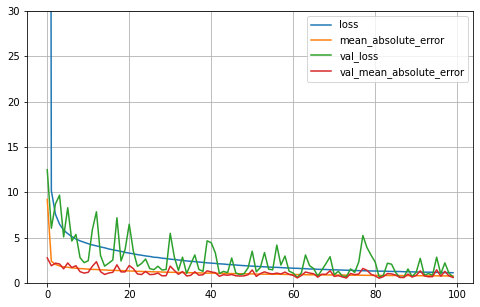

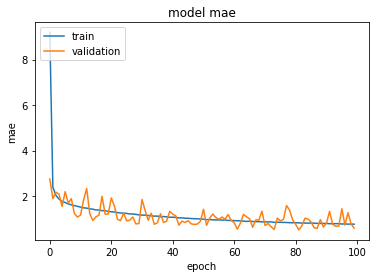

In [5]:
pd.DataFrame(history.history).plot(figsize= (8,5))
plt.grid(True)
plt.gca().set_ylim(0,30)
plt.show()

plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc = 'upper left')
plt.show()

# Robot 3 DOFs 

In [7]:
from math import cos, sin, pi
from pandas import DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import RMSprop, Adam, SGD

theta1 = []
theta2 = []
theta3 = []
px = []
py = []
beta = []
l1 = 40
l2 = 50
l3 = 20

for i in range (0,80*10, 5):
    for j in range (0,170*10, 5):
      for k in range(0, 180*10, 5):
        t1 = i/10
        t2 = j/10
        t3 = k/10
        red = t1+t2+t3
        theta1.append(t1)
        theta2.append(t2)
        theta3.append(t3)

        px.append(round(l1*cos(t1*pi/180) + l2*cos((t1+t2)*pi/180) + l3*cos((t1+t2+t3)*pi/180), 2))
        py.append(round(l1*sin(t1*pi/180) + l2*sin((t1+t2)*pi/180) + l3*sin((t1+t2+t3)*pi/180), 2))
        beta.append(red)

df = DataFrame(np.c_[theta1,theta2,theta3,px,py,beta],columns = ['theta1','theta2','theta3','px','py','beta'])
export_csv = df.to_csv (r'bai3.csv', index = None, header=True)

              theta1        theta2        theta3        px        py      beta
theta1  1.000000e+00  1.727707e-13  1.431098e-13 -0.548734  0.059211  0.307461
theta2  1.727707e-13  1.000000e+00  1.321087e-17 -0.631252 -0.806319  0.653364
theta3  1.431098e-13  1.321087e-17  1.000000e+00  0.144222 -0.237099  0.691797
px     -5.487340e-01 -6.312524e-01  1.442218e-01  1.000000  0.322558 -0.481379
py      5.921085e-02 -8.063192e-01 -2.370986e-01  0.322558  1.000000 -0.672639
beta    3.074607e-01  6.533639e-01  6.917974e-01 -0.481379 -0.672639  1.000000


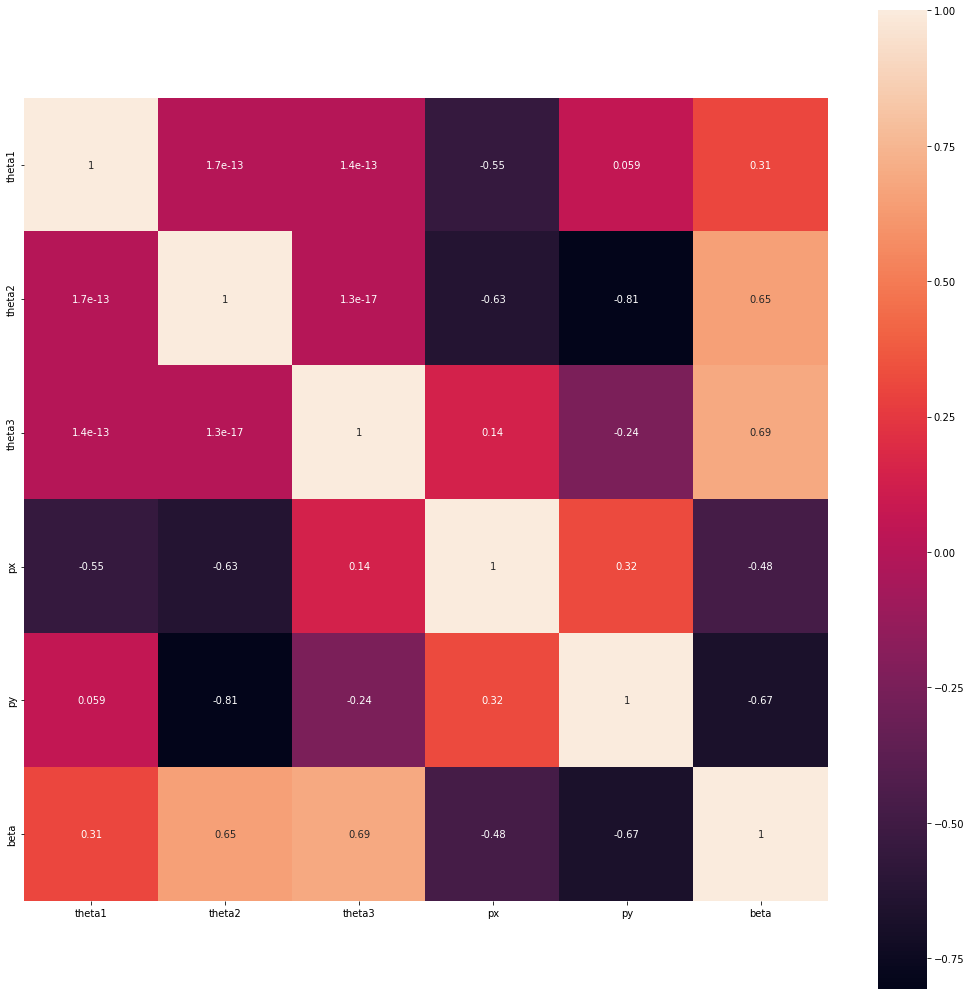

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data3 = pd.read_csv('bai3.csv')
corelations = data3.corr()
plt.subplots(figsize=(18,18))
sns.heatmap(corelations, annot= True, square= True)
print(corelations)

In [4]:
from sklearn.preprocessing import StandardScaler

x3 = data3.drop(['theta1', 'theta2', 'theta3'], axis= 1)
y3 = data3.drop(['px', 'py','beta'], axis= 1)
col_names= list(x3.columns)
s_scaler = StandardScaler()
x3_df = s_scaler.fit_transform(x3)
x3_df = pd.DataFrame(x3_df, columns= col_names)
x3_df.describe().T

,count,mean,std,min,25%,50%,75%,max
px,19584000.0,2.145784e-15,1.0,-1.978220,-0.733586,-0.186254,0.604042,3.120469
py,19584000.0,4.528842e-15,1.0,-2.377472,-0.767515,0.069517,0.759168,2.139132
beta,19584000.0,3.317911e-17,1.0,-2.852460,-0.708954,0.000000,0.708954,2.852460


In [5]:
from sklearn.model_selection import train_test_split
import keras
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop, SGD, Adam

x_train, x_test, y_train, y_test = train_test_split(x3_df, y3, test_size = 0.25, random_state= 7)

model = Sequential()
model.add(Dense(128, activation= 'relu', kernel_initializer='random_normal', input_shape= (3,)))
model.add(Dense(128, activation= 'relu'))
model.add(Dense(128, activation= 'relu'))
model.add(Dense(3))
model.summary()
opt= SGD(learning_rate = 0.01, momentum = 0.9)
model.compile(optimizer = RMSprop(), loss= 'mse', metrics= ['mean_absolute_error'])
history= model.fit(x_train, y_train, batch_size = 1024, epochs= 10, verbose= 1, validation_data= (x_test, y_test))
score= model.evaluate(x_test, y_test, verbose= 0)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               512       
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 3)                 387       
                                                                 
Total params: 33,923
Trainable params: 33,923
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
14344/14344 [==============================] - 155s 11ms/step - loss: 43.1240 - mean_absolute_error: 3.3224 - val_loss: 7.4104 - val_mean_absolute_error: 2.0344
Epoch 2/10
1

In [7]:
import numpy as np
model.save('Robot.h5')
y_pred = model.predict(x_test)
print(y_pred)
cal = pd.DataFrame(np.c_[y_test,y_pred],columns = ['theta1', 'theta2', 'theta3','theta1 predict','theta2 predict', 'theta3 predict'])
print(cal)

[[ 55.92889    31.724737  167.76544  ]
 [ 50.152287    3.4998932 125.18344  ]
 [ 19.457897   73.07744   123.89694  ]
 ...
 [ 23.789507   19.268648    5.0941916]
 [ 28.264105    9.274001   93.685165 ]
 [ 37.859886   10.672052  112.35297  ]]
         theta1  theta2  theta3  theta1 predict  theta2 predict  \
0          55.0    33.5   167.0       55.928890       31.724737   
1          48.0     7.0   123.5       50.152287        3.499893   
2          19.0    74.0   123.5       19.457897       73.077438   
3          16.5    37.0    85.0       17.138063       35.892937   
4          48.0   162.5   170.5       49.617458      162.181122   
...         ...     ...     ...             ...             ...   
4895995    45.5   128.5   177.0       46.382381      128.360352   
4895996    26.0   110.0   176.0       26.607794      109.060333   
4895997    19.5    26.5     3.5       23.789507       19.268648   
4895998    25.5    14.5    91.5       28.264105        9.274001   
4895999    35.0    15.0

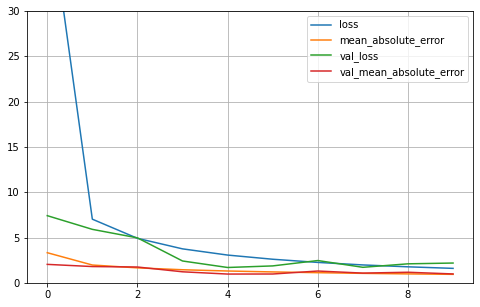

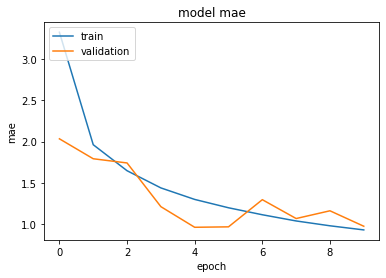

In [8]:
pd.DataFrame(history.history).plot(figsize= (8,5))
plt.grid(True)
plt.gca().set_ylim(0,30)
plt.show()

plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc = 'upper left')
plt.show()

# Nhan dien anh ban than


In [137]:
import pickle
from keras.utils import np_utils
from sklearn.utils import shuffle
with open('three.pickle', 'rb') as f:
  (x, y) = pickle.load(f)

print(x.shape, y.shape)
x_train = x[:45]
y_train = y[:45]
#reshape
x_train = x_train.reshape(x_train.shape[0],-1)

#ep kieu va dua ve mau xam
x_train = x_train.astype('float32')
x_train /= 255

#one hot encoding
y_train = np_utils.to_categorical(y_train, 2)
x_train, y_train = shuffle(x_train, y_train)

(204, 150, 150, 3) (204,)


In [138]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import RMSprop, SGD, Adam

model = Sequential()
model.add(Dense(100, activation= 'relu', input_shape= (67500,)))
model.add(Dense(100, activation= 'relu'))
model.add(Dense(100, activation= 'relu'))
model.add(Dense(100, activation= 'relu'))
model.add(Dense(100, activation= 'relu'))
model.add(Dense(100, activation= 'relu'))
model.add(Dense(100, activation= 'relu'))
model.add(Dense(2, activation= 'softmax'))

model.summary()

opt= SGD(lr = 0.01, momentum= 0.9)
model.compile(optimizer= Adam(), loss= 'binary_crossentropy', metrics= ['accuracy'] )
history= model.fit(x_train, y_train, batch_size= 32, epochs= 50, validation_split= 0.2)



Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_272 (Dense)           (None, 100)               6750100   
                                                                 
 dense_273 (Dense)           (None, 100)               10100     
                                                                 
 dense_274 (Dense)           (None, 100)               10100     
                                                                 
 dense_275 (Dense)           (None, 100)               10100     
                                                                 
 dense_276 (Dense)           (None, 100)               10100     
                                                                 
 dense_277 (Dense)           (None, 100)               10100     
                                                                 
 dense_278 (Dense)           (None, 100)             

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


2/2 [==============================] - 1s 242ms/step - loss: 0.5715 - accuracy: 1.0000 - val_loss: 1.4399e-08 - val_accuracy: 1.0000
Epoch 2/50
2/2 [==============================] - 0s 57ms/step - loss: 1.5136e-08 - accuracy: 1.0000 - val_loss: 3.7144e-19 - val_accuracy: 1.0000
Epoch 3/50
2/2 [==============================] - 0s 63ms/step - loss: 5.2276e-19 - accuracy: 1.0000 - val_loss: 3.5875e-30 - val_accuracy: 1.0000
Epoch 4/50
2/2 [==============================] - 0s 58ms/step - loss: 6.4569e-30 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/50
2/2 [==============================] - 0s 60ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/50
2/2 [==============================] - 0s 62ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/50
2/2 [==============================] - 0s 58ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_ac

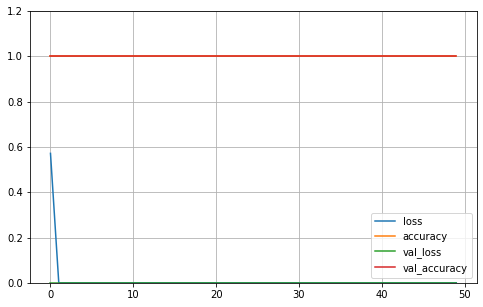

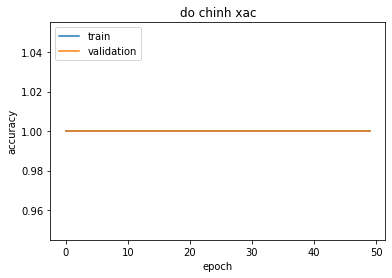

In [139]:
pd.DataFrame(history.history).plot(figsize= (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1.2)
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('do chinh xac')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc = 'upper left')
plt.show()

Nhan dien khong phai Kiet


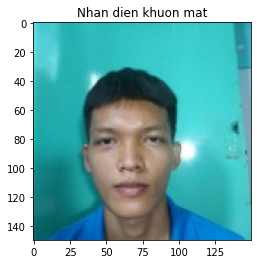

In [148]:
from pandas.core.arrays.numeric import T
import cv2
with open('luan.pickle', 'rb') as f:
  (z, t) = pickle.load(f)
z_test = x[88]
plt.imshow(cv2.cvtColor(z_test, cv2.COLOR_BGR2RGB))
image = z_test.reshape(1,-1)
image = image.astype('float32')
image /= 255
plt.title("Nhan dien khuon mat")
if np.argmax(model.predict(image)) == 1:
  print('Nhan dien la Kiet')
else:
  print('Nhan dien khong phai Kiet')



# Nhan dien ba nguoi

In [114]:
import pickle
from keras.utils import np_utils
from sklearn.utils import shuffle
with open('three.pickle', 'rb') as f:
  (X, Y) = pickle.load(f)

print(x.shape, y.shape)
x_train = X[:200]
y_train = Y[:200]
#reshape
x_train = x_train.reshape(x_train.shape[0],-1)

#ep kieu va dua ve mau xam
x_train = x_train.astype('float32')
x_train /= 255

#one hot encoding
y_train = np_utils.to_categorical(y_train, 3)
x_train, y_train = shuffle(x_train, y_train)

(204, 150, 150, 3) (204,)


In [115]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import RMSprop, SGD, Adam
model = Sequential()
model.add(Dense(100, activation= 'relu', input_shape= (67500,)))
model.add(Dense(100, activation= 'relu'))
model.add(Dense(100, activation= 'relu'))
model.add(Dense(100, activation= 'relu'))
model.add(Dense(100, activation= 'relu'))
model.add(Dense(100, activation= 'relu'))
model.add(Dense(100, activation= 'relu'))
model.add(Dense(3, activation= 'softmax'))

model.summary()

opt= SGD(lr = 0.01, momentum= 0.9)
model.compile(optimizer= Adam(), loss= 'binary_crossentropy', metrics= ['accuracy'] )
history= model.fit(x_train, y_train, batch_size= 32, epochs= 50, validation_split= 0.2)


Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_256 (Dense)           (None, 100)               6750100   
                                                                 
 dense_257 (Dense)           (None, 100)               10100     
                                                                 
 dense_258 (Dense)           (None, 100)               10100     
                                                                 
 dense_259 (Dense)           (None, 100)               10100     
                                                                 
 dense_260 (Dense)           (None, 100)               10100     
                                                                 
 dense_261 (Dense)           (None, 100)               10100     
                                                                 
 dense_262 (Dense)           (None, 100)             

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


5/5 [==============================] - 1s 99ms/step - loss: 0.8415 - accuracy: 0.3500 - val_loss: 1.0732 - val_accuracy: 0.2000
Epoch 2/50
5/5 [==============================] - 0s 60ms/step - loss: 0.4949 - accuracy: 0.6500 - val_loss: 0.1699 - val_accuracy: 0.9750
Epoch 3/50
5/5 [==============================] - 0s 61ms/step - loss: 0.1162 - accuracy: 0.9688 - val_loss: 0.0507 - val_accuracy: 1.0000
Epoch 4/50
5/5 [==============================] - 0s 57ms/step - loss: 0.0271 - accuracy: 1.0000 - val_loss: 0.0108 - val_accuracy: 1.0000
Epoch 5/50
5/5 [==============================] - 0s 57ms/step - loss: 0.0073 - accuracy: 1.0000 - val_loss: 0.0025 - val_accuracy: 1.0000
Epoch 6/50
5/5 [==============================] - 0s 62ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 7.7749e-04 - val_accuracy: 1.0000
Epoch 7/50
5/5 [==============================] - 0s 62ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 5.2416e-04 - val_accuracy: 1.0000
Epoch 8/50
5/5 [==============

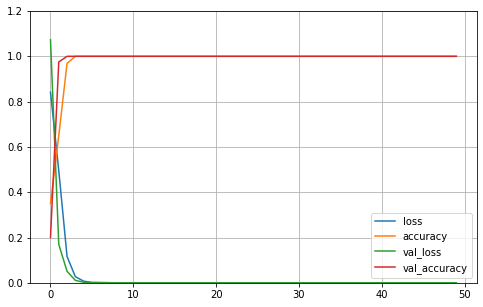

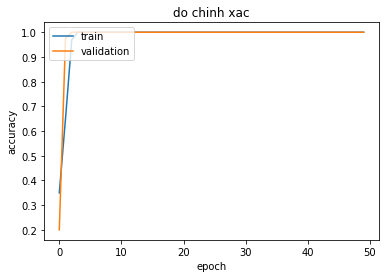

In [116]:
pd.DataFrame(history.history).plot(figsize= (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1.2)
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('do chinh xac')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc = 'upper left')
plt.show()

0
Nhan dien la Kiet


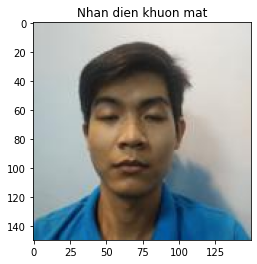

In [122]:
from pandas.core.arrays.numeric import T
import cv2
with open('luan.pickle', 'rb') as f:
  (z, t) = pickle.load(f)

z_test = X[0]
plt.imshow(cv2.cvtColor(z_test, cv2.COLOR_BGR2RGB))
image = z_test.reshape(1,-1)
image = image.astype('float32')
image /= 255
plt.title("Nhan dien khuon mat")
print(str(np.argmax(model.predict(image))))
if str(np.argmax(model.predict(image))) == '0':
  print('Nhan dien la Kiet')
elif str(np.argmax(model.predict(image))) == '1':
  print('Nhan dien la Luan')
elif str(np.argmax(model.predict(image))) == '2':
  print('Nhan dien la Vinh')